<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/Deep_NN_for_Cancer_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : Develop a Neural Network for Cancer Survival Dataset

Reference

https://machinelearningmastery.com/neural-network-for-cancer-survival-dataset/

# 1) Neural Network Learning Dynamics

Import related libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

Import dataset 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv', header=None)

In [3]:
data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Data Understanding : Describe, Histogram Plot

In [4]:
data.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


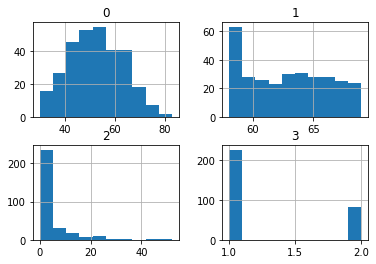

In [5]:
data.hist()
plt.show()

Change dataframe to numpy array

In [6]:
dataset = data.values

Define input and output variables

In [7]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [8]:
X = X.astype(float)
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

Split train & test dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.5, stratify=y_enc, random_state=1)

In [10]:
n_features = X_train.shape[1]

Define the model

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=n_features, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam')

Train the model

In [13]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test, y_test))

Epoch 1/200
10/10 - 14s - loss: 21.0699 - val_loss: 18.0042
Epoch 2/200
10/10 - 0s - loss: 17.2847 - val_loss: 14.3124
Epoch 3/200
10/10 - 0s - loss: 13.6416 - val_loss: 10.9202
Epoch 4/200
10/10 - 0s - loss: 10.1324 - val_loss: 7.8743
Epoch 5/200
10/10 - 0s - loss: 7.1762 - val_loss: 5.1389
Epoch 6/200
10/10 - 0s - loss: 4.5399 - val_loss: 3.0342
Epoch 7/200
10/10 - 0s - loss: 2.9670 - val_loss: 2.1693
Epoch 8/200
10/10 - 0s - loss: 2.5452 - val_loss: 2.2556
Epoch 9/200
10/10 - 0s - loss: 2.5830 - val_loss: 2.1869
Epoch 10/200
10/10 - 0s - loss: 2.4805 - val_loss: 2.0671
Epoch 11/200
10/10 - 0s - loss: 2.4132 - val_loss: 2.0280
Epoch 12/200
10/10 - 0s - loss: 2.3658 - val_loss: 1.9910
Epoch 13/200
10/10 - 0s - loss: 2.3193 - val_loss: 1.9596
Epoch 14/200
10/10 - 0s - loss: 2.2831 - val_loss: 1.9236
Epoch 15/200
10/10 - 0s - loss: 2.2428 - val_loss: 1.8931
Epoch 16/200
10/10 - 0s - loss: 2.2007 - val_loss: 1.8541
Epoch 17/200
10/10 - 0s - loss: 2.1703 - val_loss: 1.8160
Epoch 18/200
10

To predict results from test set

In [14]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Measure Accuracy

In [15]:
score = accuracy_score(y_test, y_pred)
print ('Accuracy =', round(100*score,3))

Accuracy = 71.895


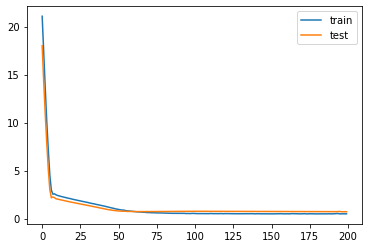

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 2) Robust Model Evaluation

Import related libraries

In [17]:
from numpy import mean
from numpy import std
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Import dataset

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv', header=None)

In [19]:
data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Change dataframe to numpy array

In [20]:
dataset = data.values

Define input and output variables

In [21]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [22]:
X = X.astype(float)
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y) 

In [23]:
kfold = StratifiedKFold(10, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [24]:
score = list()
for train_ix, test_ix in kfold.split(X,y_enc):
  # Split train & test data
  X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
  # Get number of input features
  n_features = X.shape[1]
  # Define the model
  model = Sequential()
  model.add(Dense(16, input_dim=n_features, kernel_initializer='he_normal', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam')
  # Fit the model
  model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
  # Predict test set
  y_pred =model.predict_classes(X_test)
  # Accuracy Score
  acc_score = accuracy_score(y_test, y_pred)
  print ('Accuracy =', round(acc_score*100, 2))
  # append accuracy score
  score.append(acc_score)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy = 74.19
Accuracy = 74.19
Accuracy = 74.19
Accuracy = 74.19
Accuracy = 74.19
Accuracy = 70.97
Accuracy = 73.33
Accuracy = 73.33
Accuracy = 73.33
Accuracy = 73.33


In [25]:
# To print Mean and standard deviation of accuracy score
print ('Accuracy Avg = %.3f (std = %.3f)'% (round(100*mean(score),2), round(100*std(score),2)))

Accuracy Avg = 73.530 (std = 0.940)


# 3) Final Model and make predictions

In [26]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv', header=None)

Change dataframe to numpy array

In [28]:
dataset = data.values

Define input and output variables

In [29]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [30]:
X = X.astype(float)
le = LabelEncoder()
y_enc = le.fit_transform(y)

Separate train & test dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.5, stratify=y, random_state=3)

Get number of input features

In [32]:
n_features = X.shape[1]

In [33]:
model = Sequential()
model.add(Dense(10, kernel_initializer='he_normal', input_dim=n_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the model

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model

In [35]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=0)

Predict and measure the accuracy

In [36]:
y_pred = model.predict_classes(X_test)
print ('Accuracy =', round(100*accuracy_score(y_test, y_pred),2))

Accuracy = 75.16


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


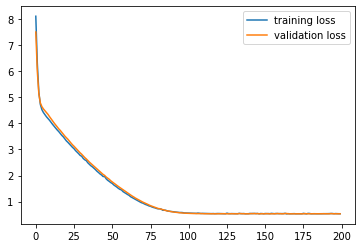

In [37]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()